In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA, NMF
from sklearn.feature_selection import SelectKBest, chi2
from sklearn import set_config
set_config(display='diagram')

In [21]:
pipe = Pipeline([
    # the reduce_dim stage is populated by the param_grid
    ('reduce_dim', 'passthrough'),
    ('classify', LinearSVC(dual=False, max_iter=10000))
])

N_FEATURES_OPTIONS = [2, 4, 8]
C_OPTIONS = [1, 10, 100, 1000]

In [22]:
param_grid = [
    {
        'reduce_dim': [PCA(iterated_power=7), NMF()],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'classify__C': C_OPTIONS
    },
    {
        'reduce_dim': [SelectKBest(chi2)],
        'reduce_dim__k': N_FEATURES_OPTIONS,
        'classify__C': C_OPTIONS
    },
]
reducer_labels = ['PCA', 'NMF', 'KBest(chi2)']

In [23]:

grid = GridSearchCV(pipe, n_jobs=1, param_grid=param_grid)
X, y = load_digits(return_X_y=True)
grid.fit(X, y)

/Users/rmogalasetty/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/Users/rmogalasetty/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,
/Users/rmogalasetty/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/Users/rmogalasetty/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and

/Users/rmogalasetty/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/Users/rmogalasetty/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/Users/rmogalasetty/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,
/Users/rmogalasetty/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and

/Users/rmogalasetty/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/Users/rmogalasetty/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,
/Users/rmogalasetty/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/Users/rmogalasetty/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200

GridSearchCV(estimator=Pipeline(steps=[('reduce_dim', 'passthrough'),
                                       ('classify',
                                        LinearSVC(dual=False,
                                                  max_iter=10000))]),
             n_jobs=1,
             param_grid=[{'classify__C': [1, 10, 100, 1000],
                          'reduce_dim': [PCA(iterated_power=7, n_components=8),
                                         NMF()],
                          'reduce_dim__n_components': [2, 4, 8]},
                         {'classify__C': [1, 10, 100, 1000],
                          'reduce_dim': [SelectKBest(score_func=<function chi2 at 0x7fe7d597cdd0>)],
                          'reduce_dim__k': [2, 4, 8]}])

In [24]:
mean_scores = np.array(grid.cv_results_['mean_test_score'])
# scores are in the order of param_grid iteration, which is alphabetical
mean_scores = mean_scores.reshape(len(C_OPTIONS), -1, len(N_FEATURES_OPTIONS))
# select score for best C
mean_scores = mean_scores.max(axis=0)
bar_offsets = (np.arange(len(N_FEATURES_OPTIONS)) *
               (len(reducer_labels) + 1) + .5)

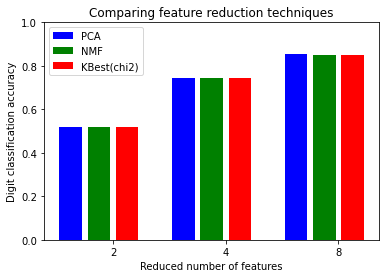

In [25]:
plt.figure()
COLORS = 'bgrcmyk'
for i, (label, reducer_scores) in enumerate(zip(reducer_labels, mean_scores)):
    plt.bar(bar_offsets + i, reducer_scores, label=label, color=COLORS[i])

plt.title("Comparing feature reduction techniques")
plt.xlabel('Reduced number of features')
plt.xticks(bar_offsets + len(reducer_labels) / 2, N_FEATURES_OPTIONS)
plt.ylabel('Digit classification accuracy')
plt.ylim((0, 1))
plt.legend(loc='upper left')

plt.show()

In [13]:
import pandas as pd
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classify__C,param_reduce_dim,param_reduce_dim__n_components,param_reduce_dim__k,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.017528,0.008875,0.000790,0.000140,1,"PCA(iterated_power=7, n_components=8)",2,NaN,"{'classify__C': 1, 'reduce_dim': PCA(iterated_...",0.522222,0.563889,0.520891,0.518106,0.465181,0.518058,0.031375,24
1,0.018380,0.000611,0.001011,0.000044,1,"PCA(iterated_power=7, n_components=8)",4,NaN,"{'classify__C': 1, 'reduce_dim': PCA(iterated_...",0.750000,0.722222,0.757660,0.774373,0.713092,0.743470,0.022686,9
2,0.028117,0.005758,0.001104,0.000470,1,"PCA(iterated_power=7, n_components=8)",8,NaN,"{'classify__C': 1, 'reduce_dim': PCA(iterated_...",0.850000,0.813889,0.860724,0.927577,0.824513,0.855340,0.039860,1
3,0.071852,0.019048,0.001904,0.000429,1,NMF(),2,NaN,"{'classify__C': 1, 'reduce_dim': NMF(), 'reduc...",0.352778,0.311111,0.325905,0.353760,0.289694,0.326650,0.024598,33
4,0.075792,0.018783,0.003146,0.001687,1,NMF(),4,NaN,"{'classify__C': 1, 'reduce_dim': NMF(), 'reduc...",0.675000,0.619444,0.696379,0.707521,0.665738,0.672816,0.030539,17
5,0.112886,0.027637,0.002381,0.000769,1,NMF(),8,NaN,"{'classify__C': 1, 'reduce_dim': NMF(), 'reduc...",0.827778,0.794444,0.830084,0.838440,0.807799,0.819709,0.016148,5
6,0.015422,0.003117,0.001682,0.000794,10,"PCA(iterated_power=7, n_components=8)",2,NaN,"{'classify__C': 10, 'reduce_dim': PCA(iterated...",0.522222,0.569444,0.523677,0.518106,0.470752,0.520840,0.031269,21
7,0.017761,0.001868,0.000912,0.000157,10,"PCA(iterated_power=7, n_components=8)",4,NaN,"{'classify__C': 10, 'reduce_dim': PCA(iterated...",0.752778,0.716667,0.760446,0.774373,0.710306,0.742914,0.025086,10
8,0.030209,0.004518,0.000963,0.000260,10,"PCA(iterated_power=7, n_components=8)",8,NaN,"{'classify__C': 10, 'reduce_dim': PCA(iterated...",0.852778,0.808333,0.860724,0.922006,0.813370,0.851442,0.040927,2
9,0.058541,0.011283,0.002783,0.001351,10,NMF(),2,NaN,"{'classify__C': 10, 'reduce_dim': NMF(), 'redu...",0.352778,0.302778,0.328691,0.353760,0.289694,0.325540,0.025889,36


In [14]:
from joblib import Memory
from shutil import rmtree

# Create a temporary folder to store the transformers of the pipeline
location = 'cachedir'
memory = Memory(location=location, verbose=10)
cached_pipe = Pipeline([('reduce_dim', PCA()),
                        ('classify', LinearSVC(dual=False, max_iter=10000))],
                       memory=memory)

# This time, a cached pipeline will be used within the grid search


# Delete the temporary cache before exiting
memory.clear(warn=False)
rmtree(location)